## Imports

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('hipparcos-voidmain.csv')

In [3]:
df.head(15)

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,CombMag,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,morePhoto,CCDM,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,m_HIP,theta,rho,e_rho,dHp,e_dHp,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,NaN,3.54,-5.20,-1.88,1.32,0.74,1.39,1.36,0.81,0.32,-0.07,-0.11,-0.24,0.09,-0.01,0.10,-0.01,0.01,0.34,0.0,0.74,1,9.643,0.020,9.130,0.019,NaN,0.482,0.025,T,0.55,0.03,L,NaN,9.2043,0.0020,0.017,87.0,NaN,9.17,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,+,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2.0,1.45,2,10.519,0.033,9.378,0.021,NaN,0.999,0.002,G,1.04,0.00,I,NaN,9.4017,0.0017,0.015,120.0,NaN,9.37,9.44,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,NaN,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0.0,-0.45,3,6.576,0.004,6.621,0.005,NaN,-0.019,0.004,G,0.00,0.00,H,NaN,6.6081,0.0007,0.008,127.0,NaN,6.60,6.62,NaN,C,NaN,NaN,00000+3852,I,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,NaN,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,-0.22,-0.09,-0.03,0.24,0.20,0.08,0.18,0.08,-0.31,-0.18,0.0,-1.46,4,8.471,0.007,8.092,0.007,NaN,0.370,0.009,T,0.43,0.01,L,NaN,8.1498,0.0011,0.015,201.0,NaN,8.12,8.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,NaN,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.10,0.24,0.06,0.26,-0.10,0.20,-0.16,-0.30,-0.19,0.06,0.0,-1.24,5,9.693,0.014,8.656,0.010,NaN,0.902,0.013,T,0.90,0.01,L,NaN,8.7077,0.0018,0.019,161.0,NaN,8.68,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2
5,H,6,NaN,00 00 04.35,+03 56 47.4,12.31,NaN,G,0.018141,3.946489,NaN,18.80,226.29,-12.84,4.03,2.18,4.99,6.15,3.20,0.35,-0.01,0.03,-0.11,-0.02,0.47,-0.02,0.03,0.31,0.35,4.0,2.95,6,NaN,NaN,NaN,NaN,NaN,1.336,0.020,G,1.55,0.03,I,NaN,12.4488,0.0085,0.091,87.0,NaN,12.30,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,1.55,M0V:,S
6,H,7,NaN,00 00 05.41,+20 02 11.8,9.64,NaN,G,0.022549,20.036602,NaN,17.74,-208.12,-200.79,1.01,0.79,1.30,1.13,0.82,0.32,0.08,-0.02,-0.04,0.12,0.06,0.11,0.00,0.16,0.43,0.0,0.21,7,10.542,0.039,9.679,0.030,NaN,0.740,0.020,G,0.79,0.02,H,NaN,9.6795,0.0021,0.017,104.0,NaN,9.65,9.72,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B+19 5185,NaN,NaN,0.79,G0,S
7,H,8,NaN,00 00 06.55,+25 53 11.3,9.05,3.0,H,0.027292,25.886474,NaN,5.17,19.09,-5.66,1.70,0.93,1.95,1.54,0.88,0.27,-0.66,-0.36,-0.38,-0.12,0.36,-0.21,-0.24,0.32,0.18,0.0,0.98,8,10.433,0.055,9.151,0.029,NaN,1.102,0.051,T,3.92,0.39,O,NaN,8.5522,0.1671,1.460,77.0,NaN,7.15,11.25,327.5,P,1.0,B,NaN,NaN,NaN,1.0,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,P,224709.0,B+25 5054,NaN,NaN,4.82,M6e-M8.5e Tc,G
8,H,9,NaN,00 00 08.48,+36 35 09.4,8.59,NaN,H,0.035342,36.585938,NaN,4.81,-6.30,8.42,0.86,0.55,0.99,1.02,0.65,0.03,0.16,-0.01,0.00,0.07,-0.02,0.08,0.04,0.10,0.13,3.0,-1.26,9,9.962,0.025,8.711,0.015,NaN,1.067,0.023,T,1.03,0.02,L,NaN,8.7534,0.0018,0.014,107.0,NaN,8.73,8.78,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224708.0,B+35 5149,NaN,NaN,1

In [4]:
df.columns.dtype


dtype('O')

## Dropping the nulls and making the target variable a binary column and make a copy of the dataset so that we have an unchanged base to refer to.

In [5]:
df=df.dropna(subset = ['HvarType'])

In [6]:
df['HvarType'].unique()

array(['C', 'P', 'D', 'U', 'R', 'M'], dtype=object)

In [7]:
df_2 = df.copy()

In [8]:
df_2.loc[df_2['HvarType'].isin(['P', 'D', 'U', 'R', 'M']), 'HvarType'] = 'S'

In [9]:
df_2['HvarType'].value_counts()

C    46552
S    25070
Name: HvarType, dtype: int64

In [10]:
df_2['AstroRef'].unique()

array(['+', nan, 'A', '*', 'B', 'C', 'G', 'E', 'D', 'S'], dtype=object)

In [11]:
df_2['AstroRef'] = df_2['AstroRef'].replace((dict.fromkeys(['A', 'B', 'C', 'G', 'E', 'D', 'S'], 1 )))

In [12]:
df_2['AstroRef'] = df_2['AstroRef'].replace((dict.fromkeys(['+', '*'], 2 )))

In [13]:
df_2['AstroRef'].fillna(value=0, inplace=True)

In [14]:
df_2['m_BTmag'].unique()

array([nan, '*', 'A', 'B', 'C', '-', 'D', 'S', 'E'], dtype=object)

In [15]:
df_2['m_BTmag'].fillna(value=0, inplace=True)

In [16]:
df_2['m_BTmag'] = df_2['m_BTmag'].replace((dict.fromkeys(['A', 'B', 'C', 'E', 'D', 'S'], 1 )))

In [17]:
 df_2['m_BTmag'] = df_2['m_BTmag'].replace((dict.fromkeys(['*', '-'], 2 )))

In [18]:
df_2['r_B-V'].unique()

array(['G', 'T', nan], dtype=object)

In [19]:
df_2['r_B-V'].fillna(value='None', inplace=True)

In [20]:
df_2['r_V-I'].unique()

array(['I', 'H', 'O', 'L', 'A', 'R', 'T', 'G', 'K', 'C', 'Q', 'F', 'B',
       'E', 'J', 'S', 'D', 'M', 'N', 'P'], dtype=object)

In [21]:
df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['A'], 1 )))

In [22]:
df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'], 2 )))

In [23]:
df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['O', 'L', 'M', 'N', 'P'], 3 )))

In [24]:
df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['Q'], 4 )))

In [25]:
df_2['r_V-I'] = df_2['r_V-I'].replace((dict.fromkeys(['R', 'T','S'], 5 )))

In [26]:
df_2['m_Hpmag'].unique()

array([nan, '*', 'B', 'A', '-', 'C', 'D', 'S', 'E'], dtype=object)

In [27]:
df_2['m_Hpmag'] = df_2['m_Hpmag'].replace((dict.fromkeys(['B', 'A', 'C', 'D', 'S', 'E'], 1 )))

In [28]:
df_2['m_Hpmag'] = df_2['m_Hpmag'].replace((dict.fromkeys(['*', '-'], 2 )))

In [29]:
df_2['m_Hpmag'].fillna(value=0, inplace=True)

In [30]:
df_2['n_CCDM'].unique()

array([nan, 'I', 'H', 'M'], dtype=object)

In [31]:
df_2['n_CCDM'] = df_2['n_CCDM'].replace((dict.fromkeys(['I', 'H', 'M'], 1 )))

In [32]:
df_2['n_CCDM'].fillna(value=0, inplace=True)

In [33]:
df_2['MultFlag'].unique()

array(['O', nan, 'C', 'G', 'X', 'V'], dtype=object)

In [34]:
df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['C'], 1 )))

In [35]:
df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['G'], 2 )))

In [36]:
df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['O'], 3 )))

In [37]:
df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['V'], 4 )))

In [38]:
df_2['MultFlag'] = df_2['MultFlag'].replace((dict.fromkeys(['X'], 5 )))

In [39]:
df_2['MultFlag'].fillna(value=0, inplace=True)

In [40]:
df_2['Source'].unique()

array([nan, 'I', 'P', 'S', 'L', 'F'], dtype=object)

In [41]:
df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['I'], 1 )))

In [42]:
df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['P'], 2 )))

In [43]:
df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['S'], 3 )))

In [44]:
df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['L'], 4 )))

In [45]:
df_2['Source'] = df_2['Source'].replace((dict.fromkeys(['F'], 5 )))

In [46]:
df_2['Source'].fillna(value=0, inplace=True)

In [47]:
df_2['Qual'].unique()

array([nan, 'S', 'A', 'B', 'D', 'C'], dtype=object)

In [48]:
df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['A'], 'GOOD'  )))

In [49]:
df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['B'], 'FAIR' )))

In [50]:
df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['C'], 'POOR' )))

In [51]:
df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['D'], 'UNCERTAIN' )))

In [52]:
df_2['Qual'] = df_2['Qual'].replace((dict.fromkeys(['S'], 'UNKNOWN' )))

In [53]:
df_2['Qual'].fillna(value='None', inplace=True)

In [54]:
df_2['Notes'].unique()

array([nan, 'P', 'D', 'G', 'W', 'Y', 'X', 'Z'], dtype=object)

In [55]:
df_2['Notes'] = df_2['Notes'].replace((dict.fromkeys(['W'], 'D+P' )))

In [56]:
df_2['Notes'] = df_2['Notes'].replace((dict.fromkeys(['X'], 'D+G' )))

In [57]:
df_2['Notes'] = df_2['Notes'].replace((dict.fromkeys(['Y'], 'G+P' )))

In [58]:
df_2['Notes'] = df_2['Notes'].replace((dict.fromkeys(['Z'], 'D+G' )))

In [59]:
df_2['Notes'].fillna(value='NONE', inplace=True)

In [60]:
df_2['r_SpType'].unique()

array(['4', 'S', 'G', 'X', '2', '1', '3', nan, 'K'], dtype=object)

In [61]:
df_2['r_SpType'].fillna(value='NONE', inplace=True)

In [62]:
df_2['r_SpType'] = df_2['r_SpType'].replace((dict.fromkeys(['1','2','3','4'], 'M' )))

0

In [63]:
catCols = [
 'r_Vmag',
 'r_B-V',
 'HvarType',
 'Qual',
 'Notes',
 'r_SpType']
catCols

['r_Vmag', 'r_B-V', 'HvarType', 'Qual', 'Notes', 'r_SpType']

In [64]:
numCols = [col for col in df_2.columns if df_2[col].dtype in ['int64', 'float64']]
numCols

['HIP',
 'Vmag',
 'VarFlag',
 'RAdeg',
 'DEdeg',
 'AstroRef',
 'Plx',
 'pmRA',
 'pmDE',
 'e_RAdeg',
 'e_DEdeg',
 'e_Plx',
 'e_pmRA',
 'e_pmDE',
 'DE:RA',
 'Plx:RA',
 'Plx:DE',
 'pmRA:RA',
 'pmRA:DE',
 'pmRA:Plx',
 'pmDE:RA',
 'pmDE:DE',
 'pmDE:Plx',
 'pmDE:pmRA',
 'F1',
 'F2',
 '---',
 'BTmag',
 'e_BTmag',
 'VTmag',
 'e_VTmag',
 'm_BTmag',
 'B-V',
 'e_B-V',
 'V-I',
 'e_V-I',
 'r_V-I',
 'Hpmag',
 'e_Hpmag',
 'Hpscat',
 'o_Hpmag',
 'm_Hpmag',
 'Hpmax',
 'HPmin',
 'Period',
 'moreVar',
 'n_CCDM',
 'Nsys',
 'Ncomp',
 'MultFlag',
 'Source',
 'theta',
 'rho',
 'e_rho',
 'dHp',
 'e_dHp',
 'HD',
 '(V-I)red']

In [65]:
used_cols = numCols + catCols
used_cols

['HIP',
 'Vmag',
 'VarFlag',
 'RAdeg',
 'DEdeg',
 'AstroRef',
 'Plx',
 'pmRA',
 'pmDE',
 'e_RAdeg',
 'e_DEdeg',
 'e_Plx',
 'e_pmRA',
 'e_pmDE',
 'DE:RA',
 'Plx:RA',
 'Plx:DE',
 'pmRA:RA',
 'pmRA:DE',
 'pmRA:Plx',
 'pmDE:RA',
 'pmDE:DE',
 'pmDE:Plx',
 'pmDE:pmRA',
 'F1',
 'F2',
 '---',
 'BTmag',
 'e_BTmag',
 'VTmag',
 'e_VTmag',
 'm_BTmag',
 'B-V',
 'e_B-V',
 'V-I',
 'e_V-I',
 'r_V-I',
 'Hpmag',
 'e_Hpmag',
 'Hpscat',
 'o_Hpmag',
 'm_Hpmag',
 'Hpmax',
 'HPmin',
 'Period',
 'moreVar',
 'n_CCDM',
 'Nsys',
 'Ncomp',
 'MultFlag',
 'Source',
 'theta',
 'rho',
 'e_rho',
 'dHp',
 'e_dHp',
 'HD',
 '(V-I)red',
 'r_Vmag',
 'r_B-V',
 'HvarType',
 'Qual',
 'Notes',
 'r_SpType']

In [69]:
df_2 = df_2.drop(columns=[col for col in df_2 if col not in used_cols])
df_2.head(3)

,HIP,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,theta,rho,e_rho,dHp,e_dHp,Notes,HD,(V-I)red,r_SpType
1,2,9.27,NaN,G,0.003797,-19.498837,2.0,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2.0,1.45,2,10.519,0.033,9.378,0.021,0,0.999,0.002,G,1.04,0.00,2,9.4017,0.0017,0.015,120.0,0.0,9.37,9.44,NaN,C,NaN,0.0,NaN,1.0,3.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NONE,224690.0,1.04,M
2,3,6.61,NaN,G,0.005008,38.859286,0.0,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0.0,-0.45,3,6.576,0.004,6.621,0.005,0,-0.019,0.004,G,0.00,0.00,2,6.6081,0.0007,0.008,127.0,0.0,6.60,6.62,NaN,C,NaN,1.0,1.0,1.0,0.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NONE,224699.0,0.00,S
6,7,9.64,NaN,G,0.022549,20.036602,0.0,17.74,-208.12,-200.79,1.01,0.79,1.30,1.13,0.82,0.32,0.08,-0.02,-0.04,0.12,0.06,0.11,0.00,0.16,0.43,0.0,0.21,7,10.542,0.039,9.679,0.030,0,0.740,0.020,G,0.79,0.02,2,9.6795,0.0021,0.017,104.0,0.0,9.65,9.72,NaN,C,NaN,0.0,NaN,1.0,0.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NONE,NaN,0.79,S


In [ ]:
df_2.fillna()

In [ ]:
df_2 = df_2.dropna(axis=1)

### Train test split, created preprocessor for our pipeline, created a list of only columns with numarical values.

In [70]:
X = df_2.drop(columns='HvarType')
y = df_2['HvarType']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [72]:
preprocessor = ColumnTransformer([
    ('SimpleImputer', SimpleImputer(strategy='median'), )
])

In [73]:
len(numCols) + len(catCols)

64

#### Label encode to target; S(some type of varible) = 1 , C(not varible) = 0

In [74]:
lE = LabelEncoder()
lE.fit(y)
y_train = lE.transform(y_train)
y_test = lE.transform(y_test)

### Created a pipeline to use in a for loop that gets the accuracy, recall, f1-score, and roc-auc for every numarical column. 

In [ ]:
lg = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('model',LogisticRegression(max_iter=5000, random_state=42))
    ])

In [75]:
pd.Series(y_train).value_counts()

0    34938
1    18778
dtype: int64

In [ ]:
used_num_cols = []
for col in numCols:
    lg = Pipeline(steps=[
        ('SimpleImputer', SimpleImputer(strategy='median')),
        ('model', LogisticRegression(max_iter=5000, random_state=42))  
    ])
    lg.fit(x_train[[col]], y_train)
    train_preds = lg.predict(x_train[[col]])
    test_preds = lg.predict(x_test[[col]])
    train_probs = lg.predict_proba(x_train[[col]])[:,1]
    test_probs = lg.predict_proba(x_test[[col]])[:,1]
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds, zero_division=0)
    test_recall = recall_score(y_test, test_preds, zero_division=0)
    train_precision = precision_score(y_train, train_preds, zero_division=0)
    test_precision = precision_score(y_test, test_preds, zero_division=0)
    train_f1 = f1_score(y_train, train_preds, zero_division=0)
    test_f1 = f1_score(y_test, test_preds, zero_division=0)
    train_rocauc = roc_auc_score(y_train, train_probs)
    test_rocauc = roc_auc_score(y_test, test_probs)
    print(col)
    if (train_accuracy > 0) and (test_accuracy > 0) and (train_recall > 0) and (test_recall > 0) and (train_precision > 0) and (test_precision > 0) and (train_f1 > 0) and (test_f1 > 0) and (train_rocauc > 0) and (test_rocauc > 0):
        used_num_cols.append(col)
        print(f'{col} added to used column list')
    print(F'\nTrain Accuracy:\t\t{train_accuracy}')
    print(F'Test Accuracy:\t\t{test_accuracy}')
    print(F"\nTrain Recall:\t\t{train_recall}")
    print(F'Test Recall:\t\t{test_recall}')
    print(F"\nTrain Precision:\t{train_precision}")
    print(F'Test Precision:\t\t{test_precision}')
    print(F"\nTrain f1:\t\t{train_f1}")
    print(F'Test f1:\t\t{test_f1}')
    print(F"\nTrain ROC-AUC:\t\t{train_rocauc}")
    print(F'Test ROC-AUC:\t\t{test_rocauc}')
    print('\n')
    print("****"*20)
    print('\n')

### Random attempts at making a model (not to be used)

In [76]:
x_train.head()

,HIP,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,moreVar,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,theta,rho,e_rho,dHp,e_dHp,Notes,HD,(V-I)red,r_SpType
16098,16113,7.10,1.0,H,51.895426,-39.880562,0.0,2.09,21.01,-2.03,0.52,0.50,0.69,0.58,0.59,-0.04,0.08,0.06,-0.13,0.06,0.07,0.03,0.00,-0.21,0.04,0.0,0.15,16113,9.077,0.012,7.267,0.006,0,1.507,0.011,T,1.54,0.02,3,7.2247,0.0018,0.018,149.0,0.0,7.19,7.25,NaN,2.0,0.0,NaN,1.0,0.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NONE,21586.0,1.52,M
4709,4713,7.12,NaN,H,15.136462,58.364136,0.0,4.52,1.93,-4.79,0.44,0.44,0.73,0.54,0.52,-0.39,0.16,0.03,0.14,0.09,0.00,0.09,0.10,0.13,-0.48,0.0,-2.14,4713,7.354,0.004,7.148,0.004,0,0.197,0.005,T,0.22,0.01,3,7.1890,0.0008,0.010,218.0,0.0,7.17,7.20,NaN,NaN,0.0,NaN,1.0,0.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NONE,5813.0,0.18,S
71346,71410,8.52,NaN,H,219.043792,-3.781015,0.0,4.45,-17.37,-1.84,1.09,0.86,1.31,1.21,1.23,-0.39,-0.11,-0.30,0.16,0.18,-0.12,0.05,-0.65,0.45,-0.49,0.0,0.60,71410,9.961,0.024,8.616,0.013,0,1.140,0.021,T,1.10,0.02,3,8.6947,0.0012,0.011,108.0,0.0,8.68,8.71,NaN,NaN,0.0,NaN,1.0,0.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NONE,128273.0,0.96,X
95181,95267,9.47,NaN,H,290.739263,-1.740568,2.0,0.64,2.11,-3.55,1.15,0.75,1.37,1.24,0.85,0.05,-0.25,-0.19,-0.27,-0.10,0.18,-0.07,-0.45,0.14,0.14,0.0,2.30,95267,11.666,0.106,9.645,0.028,2,0.541,0.107,G,1.58,0.14,5,9.5930,0.0033,0.029,93.0,2.0,9.53,9.63,NaN,NaN,1.0,1.0,2.0,1.0,3.0,GOOD,155.0,0.142,0.023,1.5,0.62,NONE,182034.0,0.61,G
101310,101400,10.72,NaN,H,308.252851,1.467898,0.0,5.53,-2.98,-4.39,1.66,1.51,2.13,2.28,2.09,0.31,0.07,-0.12,0.23,0.17,0.38,0.21,0.53,0.09,0.40,0.0,1.81,101400,12.940,0.357,10.823,0.094,0,1.790,0.304,T,1.89,0.15,2,10.8063,0.0038,0.032,78.0,0.0,10.75,10.87,NaN,NaN,0.0,NaN,1.0,0.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NONE,NaN,1.89,S


In [77]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
# x_train = logreg.transform(x_train[[col]])
# x_test = logreg.transform(x_test)

ValueError: could not convert string to float: 'H'

In [ ]:
plot_roc_curve(logreg, x_train, y_train);

In [ ]:
cv_results = cross_validate(logreg, x_train, y_train, scoring='roc_auc')
cv_results

### Making pipelines for the column transformer, to be put in a preprocessor, to be put in another pipeline to get a decision tree model ( not to be used )

In [81]:
cat_transformer = Pipeline(steps = [
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline(steps=[
        ('num_imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

In [82]:
preprocessor = ColumnTransformer(transformers=[
    ('num_transformer', num_transformer, numCols),
    ('cat_transformer', cat_transformer, catCols),
    ('tree', DecisionTreeClassifier(random_state=100, max_depth=5))
])

In [83]:
dt = Pipeline(steps = [
    ('num_transformer', num_transformer),
    ('tree', DecisionTreeClassifier(random_state=100, max_depth=5))
])


In [ ]:
type(dt)

In [ ]:
x_train.head(3)

In [ ]:
y_train

In [84]:
dt.fit(x_train[numCols], y_train)

y_hat_test = dt.predict(x_test[numCols]) 

### Decision tree confusion matrix ( not to be used )

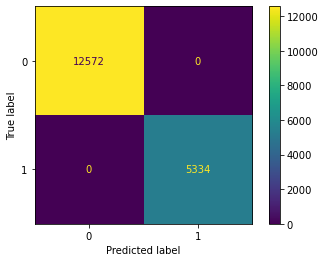

In [85]:
plot_confusion_matrix(dt, x_test[numCols], y_hat_test);


In [86]:
y_actual = df['HvarType']
y_pred_baseline = ['0'] * len(df)
accuracy_score(y_actual, y_pred_baseline)


0.0

### Logisitic Regression pipeline for Logisitic Regression model ( Numerical columns only; use this )

In [90]:
logreg = Pipeline(steps = [
    ('num_transformer', num_transformer),
    ('lg', LogisticRegression(random_state=42, max_iter=5000))
])


In [91]:
logreg.fit(x_train, y_train)
y_hat_test = logreg.predict(x_test) 


# ax.set_xlabel('al')
# ax.set_ylabel('household glass type')
# ax.legend();

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'H'

In [ ]:
y_hat_test

In [ ]:
plot_roc_curve(logreg, x_train[numCols], y_train);

In [ ]:
plot_roc_curve(logreg, x_test[numCols], y_test);

In [ ]:
catCols

In [ ]:
'Catalog', Catalog ( Catalog_Name ) - Catalogue (H=Hipparcos) ,
 'Proxy', Proxy ( Prox_10asec ) - Proximity flag , 
 'RAhms', RAhms ( RA ) - RA in h m s, ICRS (J1991.25),
 'DEdms', DEdms ( Dec ) - Dec in deg ' ", ICRS (J1991.25)
 'r_Vmag', r_Vmag ( Vmag_Source ) - Source of magnitude
 'AstroRef', AstroRef ( Astrom_Ref_Dbl ) - Reference flag for astrometry
 'm_BTmag', m_BTmag ( BT_Mag_Ref_Dbl ) - Reference flag for BT and VTmag
 'r_B-V', r_B-V ( BV_Mag_Source ) - Source of BV from Ground or Tycho
 'r_V-I', r_V-I ( VI_Color_Source ) - Source of VI
 'CombMag', CombMag ( Mag_Ref_Dbl ) - Flag for combined Vmag, BV, VI
 'm_Hpmag', m_Hpmag ( Hip_Mag_Ref_Dbl ) - Reference flag for Hpmag
 'morePhoto', morePhoto ( Var_Curv_Annex ) - Light curve Annex
 'CCDM', CCDM ( CCDM_Id ) - CCDM identifier
 'n_CCDM', n_CCDM ( CCDM_History ) - Historical status flag
 'MultFlag', MultFlag ( Dbl_Mult_Annex ) - Double and or Multiple Systems flag
 'Source', Source ( Astrom_Mult_Source ) - Astrometric source flag
 'Qual', Qual ( Dbl_Soln_Qual ) - Solution quality flag
 'm_HIP', m_HIP ( Dbl_Ref_ID ) - Component identifiers
 'Survey', Survey ( Survey_Star ) - Flag indicating a Survey Star
 'Chart', Chart ( ID_Chart ) - Identification Chart
 'Notes', Notes ( Notes ) - Existence of notes
 'BD', BD ( BD_Id ) - Bonner DM (I 119), (I 122)
 'CoD', CoD ( CoD_Id ) - Cordoba Durchmusterung (DM) (I 114)
 'CPD', CPD ( CPD_Id ) - Cape Photographic DM (I 108)
 'SpType', SpType ( Spect_Type ) - Spectral type
 'r_SpType', r_SpType ( Spect_Type_Source ) - Source of spectral type 

In [ ]:
0. Catalog ( Catalog_Name ) - Catalogue (H=Hipparcos) 
1. HIP ( HIP_Number ) - Identifier (HIP number) 
2. Proxy ( Prox_10asec ) - Proximity flag 
3. RAhms ( RA ) - RA in h m s, ICRS (J1991.25) 
4. DEdms ( Dec ) - Dec in deg ' ", ICRS (J1991.25) 
5. Vmag ( Vmag ) - Magnitude in Johnson V 
6. VarFlag ( Var_Flag ) - Coarse variability flag 
7. r_Vmag ( Vmag_Source ) - Source of magnitude 
8. RAdeg ( RA_Deg ) - RA in degrees (ICRS, Epoch-J1991.25) 
9. DEdeg ( Dec_Deg ) - Dec in degrees (ICRS, Epoch-J1991.25) 
10. AstroRef ( Astrom_Ref_Dbl ) - Reference flag for astrometry 
11. Plx ( Parallax ) - Trigonometric parallax 
12. pmRA ( pm_RA ) - Proper motion in RA 
13. pmDE ( pm_Dec ) - Proper motion in Dec 
14. e_RAdeg ( RA_Error ) - Standard error in RA*cos(Dec_Deg) 
15. e_DEdeg ( Dec_Error ) - Standard error in Dec_Deg 
16. e_Plx ( Parallax_Error ) - Standard error in Parallax 
17. e_pmRA ( pm_RA_Error ) - Standard error in pmRA 
18. e_pmDE ( pm_Dec_Error ) - Standard error in pmDE 
19. DE:RA ( Crl_Dec_RA ) - (DE over RA)xCos(delta) 
20. Plx:RA ( Crl_Plx_RA ) - (Plx over RA)xCos(delta) 
21. Plx:DE ( Crl_Plx_Dec ) - (Plx over DE) 
22. pmRA:RA ( Crl_pmRA_RA ) - (pmRA over RA)xCos(delta) 
23. pmRA:DE ( Crl_pmRA_Dec ) - (pmRA over DE) 
24. pmRA:Plx ( Crl_pmRA_Plx ) - (pmRA over Plx) 
25. pmDE:RA ( Crl_pmDec_RA ) - (pmDE over RA)xCos(delta) 
26. pmDE:DE ( Crl_pmDec_Dec ) - (pmDE over DE) 
27. pmDE:Plx ( Crl_pmDec_Plx ) - (pmDE over Plx) 
28. pmDE:pmRA ( Crl_pmDec_pmRA ) - (pmDE over pmRA) 
29. F1 ( Reject_Percent ) - Percentage of rejected data 
30. F2 ( Quality_Fit ) - Goodness-of-fit parameter 
31. --- ( HIP_Number_repeat ) - HIP number (repetition) 
32. BTmag ( BT_Mag ) - Mean BT magnitude 
33. e_BTmag ( BT_Mag_Error ) - Standard error on BTmag 
34. VTmag ( VT_Mag ) - Mean VT magnitude 
35. e_VTmag ( VT_Mag_Error ) - Standard error on VTmag 
36. m_BTmag ( BT_Mag_Ref_Dbl ) - Reference flag for BT and VTmag 
37. B-V ( BV_Color ) - Johnson BV colour 
38. e_B-V ( BV_Color_Error ) - Standard error on BV 
39. r_B-V ( BV_Mag_Source ) - Source of BV from Ground or Tycho 
40. V-I ( VI_Color ) - Colour index in Cousins' system 
41. e_V-I ( VI_Color_Error ) - Standard error on VI 
42. r_V-I ( VI_Color_Source ) - Source of VI 
43. CombMag ( Mag_Ref_Dbl ) - Flag for combined Vmag, BV, VI 
44. Hpmag ( Hip_Mag ) - Median magnitude in Hipparcos system 
45. e_Hpmag ( Hip_Mag_Error ) - Standard error on Hpmag 
46. Hpscat ( Scat_Hip_Mag ) - Scatter of Hpmag 
47. o_Hpmag ( N_Obs_Hip_Mag ) - Number of observations for Hpmag 
48. m_Hpmag ( Hip_Mag_Ref_Dbl ) - Reference flag for Hpmag 
49. Hpmax ( Hip_Mag_Max ) - Hpmag at maximum (5th percentile) 
50. HPmin ( Hip_Mag_Min ) - Hpmag at minimum (95th percentile) 
51. Period ( Var_Period ) - Variability period (days) 
52. HvarType ( Hip_Var_Type ) - Variability type 
53. moreVar ( Var_Data_Annex ) - Additional data about variability 
54. morePhoto ( Var_Curv_Annex ) - Light curve Annex 
55. CCDM ( CCDM_Id ) - CCDM identifier 
56. n_CCDM ( CCDM_History ) - Historical status flag 
57. Nsys ( CCDM_N_Entries ) - Number of entries with same CCDM 
58. Ncomp ( CCDM_N_Comp ) - Number of components in this entry 
59. MultFlag ( Dbl_Mult_Annex ) - Double and or Multiple Systems flag 
60. Source ( Astrom_Mult_Source ) - Astrometric source flag 
61. Qual ( Dbl_Soln_Qual ) - Solution quality flag 
62. m_HIP ( Dbl_Ref_ID ) - Component identifiers 
63. theta ( Dbl_Theta ) - Position angle between components 
64. rho ( Dbl_Rho ) - Angular separation of components 
65. e_rho ( Rho_Error ) - Standard error of rho 
66. dHp ( Diff_Hip_Mag ) - Magnitude difference of components 
67. e_dHp ( dHip_Mag_Error ) - Standard error in dHp 
68. Survey ( Survey_Star ) - Flag indicating a Survey Star 
69. Chart ( ID_Chart ) - Identification Chart 
70. Notes ( Notes ) - Existence of notes 
71. HD ( HD_Id ) - HD number (III 135) 
72. BD ( BD_Id ) - Bonner DM (I 119), (I 122) 
73. CoD ( CoD_Id ) - Cordoba Durchmusterung (DM) (I 114) 
74. CPD ( CPD_Id ) - Cape Photographic DM (I 108) 
75. (V-I)red ( VI_Color_Reduct ) - VI used for reductions 
76. SpType ( Spect_Type ) - Spectral type 
77. r_SpType ( Spect_Type_Source ) - Source of spectral type 